### Read both csv files and assign headers
- df1 = INFORM Risk data
- df2 = Crisis Severity data

In [2]:
df1 = pd.read_csv('Edited-INFORM Risk 2024.csv')

In [3]:
df1.head()

,Unnamed: 0,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,...,Governance,Infrastructure,Communication,Physical infrastructure,Access to health care,Number of Missing Indicators,% of Missing Indicators,Recentness data (average years),Countries in HVC = _NO,Countries in HVC = _YES
0,2,Afghanistan,AFG,8.1,Very High,4.0,-187.4,8.7,5.7,8.7,...,8.0,7.0,6.3,6.5,8.1,4.0,0.08,-28.31,0,1
1,3,Albania,ALB,3.1,Low,104.0,-156.3,3.4,5.7,8.3,...,5.7,2.3,2.0,1.4,3.4,6.0,0.12,-29.61,1,0
2,4,Algeria,DZA,3.6,Medium,81.0,-144.2,3.8,3.2,7.9,...,6.5,3.7,2.9,4.1,4.1,0.0,0.00,-27.04,1,0
3,5,Angola,AGO,5.2,High,32.0,-142.3,4.2,2.9,0.1,...,6.9,7.3,6.3,7.9,7.8,0.0,0.00,-26.69,1,0
4,6,Antigua and Barbuda,ATG,2.3,Low,151.0,-183.8,2.0,3.7,5.1,...,5.3,1.3,0.2,0.7,3.1,18.0,0.35,-35.21,1,0


In [4]:
df1 = df1.drop(columns='Unnamed: 0')

In [5]:
data = pd.read_csv('INFORM_Severity-Feb2024.csv', encoding='unicode_escape')

In [6]:
data.head()

,CRISIS,CRISIS ID,COUNTRY,ISO3,DRIVERS,INFORM Severity Index,INFORM Severity category,INFORM Severity category.1,Trend (last 3 months),Reliability,Impact of the crisis,Geographical,Human,Conditions of people affected,People in need,Concentration of conditions,Complexity of the crisis,Society and safety,Operating environment,Regions
0,Weights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(a-z),NaN,NaN,(a-z),NaN,(1-5),(1-5),(Very Low-Very High),(Decreasing-Stable-Increasing),(Very Low-Very High),(1-5),(1-5),(1-5),(1-5),(1-5),(1-5),(1-5),(1-5),(1-5),NaN
2,Complex crisis in Afghanistan,AFG001,Afghanistan,AFG,"Conflict,Violence,Displacement,Drought,Earthqu...",4.4,5,Very High,Stable,Very High,4.8,4.9,4.7,4.5,5.0,4.0,4.0,3.9,4.0,Asia
3,Earthquake in Herat Province,AFG006,Afghanistan,AFG,Earthquake,2.8,3,Medium,Stable,High,2.5,1.4,2.9,2.7,2.4,3.0,3.3,3.9,2.5,Asia
4,Drought in South-West Angola,AGO002,Angola,AGO,Drought,3.1,4,High,Increasing,Medium,2.8,3.7,2.2,3.9,3.7,4.0,2.2,3.1,1.0,Africa


In [7]:
data = data.drop(index=[0,1], axis=0)

#### Reset the dataframe index

In [9]:
data = data.reset_index(drop=True)

#### Allows outputs to not be truncated

In [10]:
pd.options.display.max_rows = 1000

#### Replace 'x' values with null

In [11]:
data.replace(to_replace='x', value=None, inplace=True)

#### Check column types

In [12]:
for column in data.columns:
    print(type(column), ',', column,',', data[column][4])

<class 'str'> , CRISIS , Nagorno-Karabakh conflict in Azerbaijan
<class 'str'> , CRISIS ID , AZE002
<class 'str'> , COUNTRY , Azerbaijan
<class 'str'> , ISO3 , AZE
<class 'str'> , DRIVERS , Conflict,Displacement
<class 'str'> , INFORM Severity Index , 2.1
<class 'str'> , INFORM Severity category , 3
<class 'str'> , INFORM Severity category.1 , Medium
<class 'str'> , Trend (last 3 months) , Decreasing
<class 'str'> , Reliability , Medium
<class 'str'> , Impact of the crisis , 2.5
<class 'str'> , Geographical , 0.9
<class 'str'> , Human , 3.1
<class 'str'> , Conditions of people affected , 1.0
<class 'str'> , People in need , 0.0
<class 'str'> , Concentration of conditions , 2.0
<class 'str'> , Complexity of the crisis , 3.3
<class 'str'> , Society and safety , 3.0
<class 'str'> , Operating environment , 3.5
<class 'str'> , Regions , Middle east


#### Convert numerical columns from strings to floats

In [13]:
columns = ['INFORM Severity Index','INFORM Severity category', 'Impact of the crisis', 'Geographical','Human',  
           'Conditions of people affected', 'People in need', 'Concentration of conditions', 'Complexity of the crisis', 
           'Society and safety', 'Operating environment']
data[columns] = data[columns].astype(float)

#### Fill null values using mean imputation

In [ ]:
data.isna().sum()

In [14]:
for col in columns:
    data[col] = data[col].fillna(value=data[col].mean())

#### Drop columns that you don't need

In [15]:
coltodrop = ['Reliability','Geographical','Human', 'People in need', 'Concentration of conditions', 'Society and safety', 'Operating environment']
data = data.drop(columns=coltodrop)

In [ ]:
#data.index = range(1, len(data) + 1)

### Ensure every row has a unique location
There are some crises that impact multiple countries. In the COUNTRY column, all the impacted countries are listed together. Here we want only one country listed per row so we create multiple rows for one crisis. Each row for that crisis is assigned a different country

In [16]:
# Create 2 new columns 
data['Split Country'] = None
data['Split ISO'] = None

# Turn string into list of strings
# Separated by a comma
for i, cou in enumerate(data['COUNTRY']):
    data['Split Country'][i] = cou.split(",")
    
for i, cou in enumerate(data['ISO3']):
    data['Split ISO'][i] = cou.split(",")

C:\Users\Huawei MateBook D14\AppData\Local\Temp\ipykernel_31044\2998153590.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Split Country'][i] = cou.split(",")
C:\Users\Huawei MateBook D14\AppData\Local\Temp\ipykernel_31044\2998153590.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Split ISO'][i] = cou.split(",")


In [17]:
data.head()

,CRISIS,CRISIS ID,COUNTRY,ISO3,DRIVERS,INFORM Severity Index,INFORM Severity category,INFORM Severity category.1,Trend (last 3 months),Impact of the crisis,Conditions of people affected,Complexity of the crisis,Regions,Split Country,Split ISO
0,Complex crisis in Afghanistan,AFG001,Afghanistan,AFG,"Conflict,Violence,Displacement,Drought,Earthqu...",4.4,5.0,Very High,Stable,4.8,4.5,4.0,Asia,[Afghanistan],[AFG]
1,Earthquake in Herat Province,AFG006,Afghanistan,AFG,Earthquake,2.8,3.0,Medium,Stable,2.5,2.7,3.3,Asia,[Afghanistan],[AFG]
2,Drought in South-West Angola,AGO002,Angola,AGO,Drought,3.1,4.0,High,Increasing,2.8,3.9,2.2,Africa,[Angola],[AGO]
3,Nagorno-Karabakh Conflict in Armenia,ARM002,Armenia,ARM,"Conflict,Displacement",2.3,3.0,Medium,Increasing,2.3,2.5,2.0,Middle east,[Armenia],[ARM]
4,Nagorno-Karabakh conflict in Azerbaijan,AZE002,Azerbaijan,AZE,"Conflict,Displacement",2.1,3.0,Medium,Decreasing,2.5,1.0,3.3,Middle east,[Azerbaijan],[AZE]


#### Explode country and ISO columns

In [18]:
data = data.explode(['Split Country', 'Split ISO'])

#### Reset dataframe index

In [20]:
data = data.reset_index(drop=True)

### Create a copy of the dataframe 
##### **This will be the one you merge with the INDEX Risk data

In [21]:
df2 = data[['Split Country', 'Split ISO']]

#### Drop any duplicates

In [22]:
df2 = df2.drop_duplicates()

#### Rename columns

In [24]:
df2 = df2.rename(columns={"Split Country": "Country" , "Split ISO": "ISO3"})

#### Sort alphabetically by country
##### **Important so that the merges work below

In [25]:
df2 = df2.sort_values(by='Country')

#### Reset dataframe index

In [26]:
df2 = df2.reset_index(drop=True)

#### Data MUST be sorted alphabetically for the next two operations to work

In [28]:
data = data.sort_values(by='Split Country')

In [29]:
data = data.reset_index(drop=True)

### Calculate how many crises per country in "Crisis Count" column


In [30]:
crisiscount={}
for con in data['Split Country']:
    crisiscount[con] = data['Split Country'].str.count(con).sum()

crisis_count = pd.DataFrame(data=crisiscount.items(),columns=['Country','Crisis Count'])

In [32]:
crisis_count.head(20)

,Country,Crisis Count
0,Afghanistan,2
1,Algeria,4
2,Angola,1
3,Armenia,2
4,Azerbaijan,2
5,Bangladesh,3
6,Belarus,1
7,Brazil,3
8,Bulgaria,1
9,Burkina Faso,1


#### Merge "Crisis Count" with df2

In [33]:
df2 = pd.merge(df2, crisis_count, on='Country', how='left')

In [35]:
df2.head()

,Country,ISO3,Crisis Count
0,Afghanistan,AFG,2
1,Algeria,DZA,4
2,Angola,AGO,1
3,Armenia,ARM,2
4,Azerbaijan,AZE,2


### Calculate average crisis severity per country in "Average Severity Index" column

In [36]:
avgSI = {}    

for i, row in data.iterrows():
    if i < 182:
        country = row['Split Country']
        sev = row['INFORM Severity Index']

        if country not in avgSI.keys(): 
            avgSI[country] = sev 
        else:
            if country == data['Split Country'][i+1]:
                avgSI[country] = avgSI[country] + sev
                
            else:
                avgSI[country] = (avgSI[country] + sev) / data['Split Country'].str.count(country).sum()
                
                
avg_SI = pd.DataFrame(data=avgSI.items(),columns=['Country','Average Severity Index'])
    

In [37]:
avg_SI

,Country,Average Severity Index
0,Afghanistan,3.600000
1,Algeria,2.600000
2,Angola,3.100000
3,Armenia,2.500000
4,Azerbaijan,2.400000
5,Bangladesh,3.800000
6,Belarus,1.800000
7,Brazil,2.733333
8,Bulgaria,1.700000
9,Burkina Faso,4.100000


#### Merge "Average Severity Index" with df2

In [38]:
df2 = pd.merge(df2, avg_SI, on='Country', how='left')

In [49]:
df2.head()

,Country,ISO3,Crisis Count,Average Severity Index,Average Severity Category
0,Afghanistan,AFG,2,3.6,High
1,Algeria,DZA,4,2.6,Medium
2,Angola,AGO,1,3.1,High
3,Armenia,ARM,2,2.5,Medium
4,Azerbaijan,AZE,2,2.4,Medium


#### Create column with the average severity index rounded UP
##### This is how the INFORM database calculates "severity category"

In [39]:
df2['rounded'] = df2['Average Severity Index'].apply(np.ceil)

In [40]:
df2['rounded'].unique().tolist()

[4.0, 3.0, 2.0, 5.0]

### Create "Average Severity Category" column on df2

In [41]:
df2['Average Severity Category']=None

In [42]:
for i,row in enumerate(df2['rounded']):
    if row == 2.0:
        df2['Average Severity Category'][i] = "Low"
    if row == 3.0:
        df2['Average Severity Category'][i] = "Medium"
    if row == 4.0:
        df2['Average Severity Category'][i] = "High"
    if row == 5.0:
        df2['Average Severity Category'][i] = "Very High"
        

C:\Users\Huawei MateBook D14\AppData\Local\Temp\ipykernel_31044\4287628861.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Average Severity Category'][i] = "High"
C:\Users\Huawei MateBook D14\AppData\Local\Temp\ipykernel_31044\4287628861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Average Severity Category'][i] = "Medium"
C:\Users\Huawei MateBook D14\AppData\Local\Temp\ipykernel_31044\4287628861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [43]:
df2 = df2.drop(columns='rounded')

In [44]:
df2.head()

,Country,ISO3,Crisis Count,Average Severity Index,Average Severity Category
0,Afghanistan,AFG,2,3.6,High
1,Algeria,DZA,4,2.6,Medium
2,Angola,AGO,1,3.1,High
3,Armenia,ARM,2,2.5,Medium
4,Azerbaijan,AZE,2,2.4,Medium


### Merge df1 (INFORM Risk) with df2 (Severity) on the ISO column

In [50]:
df1.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,River Flood,...,Governance,Infrastructure,Communication,Physical infrastructure,Access to health care,Number of Missing Indicators,% of Missing Indicators,Recentness data (average years),Countries in HVC = _NO,Countries in HVC = _YES
0,Afghanistan,AFG,8.1,Very High,4.0,-187.4,8.7,5.7,8.7,7.3,...,8.0,7.0,6.3,6.5,8.1,4.0,0.08,-28.31,0,1
1,Albania,ALB,3.1,Low,104.0,-156.3,3.4,5.7,8.3,4.6,...,5.7,2.3,2.0,1.4,3.4,6.0,0.12,-29.61,1,0
2,Algeria,DZA,3.6,Medium,81.0,-144.2,3.8,3.2,7.9,3.6,...,6.5,3.7,2.9,4.1,4.1,0.0,0.00,-27.04,1,0
3,Angola,AGO,5.2,High,32.0,-142.3,4.2,2.9,0.1,3.9,...,6.9,7.3,6.3,7.9,7.8,0.0,0.00,-26.69,1,0
4,Antigua and Barbuda,ATG,2.3,Low,151.0,-183.8,2.0,3.7,5.1,0.0,...,5.3,1.3,0.2,0.7,3.1,18.0,0.35,-35.21,1,0


In [51]:
merged_df = pd.merge(df1, df2, on='ISO3', how='left')

In [52]:
merged_df.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,River Flood,...,Access to health care,Number of Missing Indicators,% of Missing Indicators,Recentness data (average years),Countries in HVC = _NO,Countries in HVC = _YES,Country,Crisis Count,Average Severity Index,Average Severity Category
0,Afghanistan,AFG,8.1,Very High,4.0,-187.4,8.7,5.7,8.7,7.3,...,8.1,4.0,0.08,-28.31,0,1,Afghanistan,2.0,3.6,High
1,Albania,ALB,3.1,Low,104.0,-156.3,3.4,5.7,8.3,4.6,...,3.4,6.0,0.12,-29.61,1,0,NaN,NaN,NaN,NaN
2,Algeria,DZA,3.6,Medium,81.0,-144.2,3.8,3.2,7.9,3.6,...,4.1,0.0,0.00,-27.04,1,0,Algeria,4.0,2.6,Medium
3,Angola,AGO,5.2,High,32.0,-142.3,4.2,2.9,0.1,3.9,...,7.8,0.0,0.00,-26.69,1,0,Angola,1.0,3.1,High
4,Antigua and Barbuda,ATG,2.3,Low,151.0,-183.8,2.0,3.7,5.1,0.0,...,3.1,18.0,0.35,-35.21,1,0,NaN,NaN,NaN,NaN


#### Country column is repeated so drop it

In [53]:
merged_df = merged_df.drop(columns='Country')

#### Rename columns

In [54]:
merged_df = merged_df.rename(columns={'Average Severity Index': 'Average Crisis Severity Index', 'Average Severity Category': 'Average Crisis Severity Category'})

#### If a country does NOT have any crises, replace null with 0 for "Crisis Count"

In [56]:
merged_df['Crisis Count'].fillna(0, inplace=True)

In [57]:
merged_df.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,River Flood,...,Physical infrastructure,Access to health care,Number of Missing Indicators,% of Missing Indicators,Recentness data (average years),Countries in HVC = _NO,Countries in HVC = _YES,Crisis Count,Average Crisis Severity Index,Average Crisis Severity Category
0,Afghanistan,AFG,8.1,Very High,4.0,-187.4,8.7,5.7,8.7,7.3,...,6.5,8.1,4.0,0.08,-28.31,0,1,2.0,3.6,High
1,Albania,ALB,3.1,Low,104.0,-156.3,3.4,5.7,8.3,4.6,...,1.4,3.4,6.0,0.12,-29.61,1,0,0.0,NaN,NaN
2,Algeria,DZA,3.6,Medium,81.0,-144.2,3.8,3.2,7.9,3.6,...,4.1,4.1,0.0,0.00,-27.04,1,0,4.0,2.6,Medium
3,Angola,AGO,5.2,High,32.0,-142.3,4.2,2.9,0.1,3.9,...,7.9,7.8,0.0,0.00,-26.69,1,0,1.0,3.1,High
4,Antigua and Barbuda,ATG,2.3,Low,151.0,-183.8,2.0,3.7,5.1,0.0,...,0.7,3.1,18.0,0.35,-35.21,1,0,0.0,NaN,NaN


## Get data on Risk Indicators
These indicators are the measurments used to calculate the Risk INDEX. 
Here is additional info on the indicator sources: https://drmkc.jrc.ec.europa.eu/inform-index/INFORM-Risk/Data-Sources

In [226]:
indicators = pd.read_csv('RISK-Indicator Data.csv', header=1)

In [227]:
indicators = indicators.drop(index=[0,1,2], axis=0)

In [228]:
indicators = indicators.reset_index(drop=True)

In [229]:
indicators.rename(columns={'Unnamed: 1': 'ISO3'}, inplace=True)

#### Display column types

In [230]:
for column in indicators.columns:
    print(type(column), ',', column,',', indicators[column][4])

<class 'str'> , COUNTRY , Antigua and Barbuda
<class 'str'> , ISO3 , ATG
<class 'str'> , Physical exposure to earthquake MMI VI , 189
<class 'str'> , Physical exposure to earthquake MMI VIII , 0
<class 'str'> , Annual Expected Exposed People to River Floods , 0
<class 'str'> , Annual Expected Exposed People to Tsunamis , 0
<class 'str'> , Annual Expected Exposed People to Cyclone's Wind SS1 , 9331
<class 'str'> , Annual Expected Exposed People to Cyclone's Wind SS3 , 1589
<class 'str'> , Annual Expected Exposed People to Coastal Floods , 160
<class 'str'> , Total affected by Drought , 0
<class 'str'> , Frequency of Drought events , 0.00
<class 'str'> , Agriculture Drought probability , 0.13
<class 'str'> , Population exposed to CCHF (zoonoses) , No data
<class 'str'> , Population exposed to EVD (zoonoses) , No data
<class 'str'> , Population exposed to Lassa Fever (zoonoses) , No data
<class 'str'> , Population exposed to MVD (zoonoses) , No data
<class 'str'> , Populations at risk of 

#### Replace "No Data" with null and delete columns with any nulls

In [231]:
indicators.replace(to_replace='No data', value=None, inplace=True)

In [233]:
for col in indicators.columns:
    if indicators[col].isna().sum() > 0:
        indicators = indicators.drop(columns=col)

#### Convert numeric types from strings into floats

In [237]:
columns = indicators.iloc[:,2:].columns
indicators[columns] = indicators[columns].astype(float)

In [239]:
indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 46 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   COUNTRY                                                                   191 non-null    object 
 1   ISO3                                                                      191 non-null    object 
 2   Physical exposure to earthquake MMI VI                                    191 non-null    float64
 3   Physical exposure to earthquake MMI VIII                                  191 non-null    float64
 4   Annual Expected Exposed People to River Floods                            191 non-null    float64
 5   Annual Expected Exposed People to Tsunamis                                191 non-null    float64
 6   Annual Expected Exposed People to Cyclone's Wind SS1              

In [238]:
indicators.head()

,COUNTRY,ISO3,Physical exposure to earthquake MMI VI,Physical exposure to earthquake MMI VIII,Annual Expected Exposed People to River Floods,Annual Expected Exposed People to Tsunamis,Annual Expected Exposed People to Cyclone's Wind SS1,Annual Expected Exposed People to Cyclone's Wind SS3,Annual Expected Exposed People to Coastal Floods,Total affected by Drought,...,Returned Refugees,Average Dietary Energy Supply Adequacy,Prevalence of Undernourishment,Government Effectiveness,Access to electricity,Mobile cellular subscriptions,Road lenght,People using at least basic sanitation services (% of population),People using at least basic drinking water services (% of population),Land area (sq. km)
0,Afghanistan,AFG,80872.0,38334.0,301049.0,0.0,0.0,0.0,0.0,886000.0,...,6506.0,107.0,30.1,-1.63,97.7,56.6,72000.0,50.5,75.1,652230.0
1,Albania,ALB,5974.0,4731.0,7454.0,41.0,0.0,0.0,21706.0,91429.0,...,0.0,135.0,4.1,0.00,100.0,92.3,19000.0,99.3,95.1,27400.0
2,Algeria,DZA,75089.0,22015.0,18114.0,1.0,0.0,0.0,70.0,0.0,...,0.0,152.0,2.4,-0.62,99.8,106.4,110000.0,86.0,94.4,2381740.0
3,Angola,AGO,0.0,0.0,20930.0,0.0,0.0,0.0,2344.0,197920.0,...,17.0,114.0,21.6,-1.06,48.2,44.4,51000.0,51.7,57.2,1246700.0
4,Antigua and Barbuda,ATG,189.0,0.0,0.0,0.0,9331.0,1589.0,160.0,0.0,...,0.0,101.0,15.4,-0.14,100.0,197.4,980.0,87.5,96.7,440.0


### Select only the columns you need from merged_df

In [240]:
df3 = merged_df[['COUNTRY', 'ISO3', 'INFORM RISK', 'RISK CLASS', 'Crisis Count', 'Average Crisis Severity Index', 'Average Crisis Severity Category']]

In [241]:
df3.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Crisis Count,Average Crisis Severity Index,Average Crisis Severity Category
0,Afghanistan,AFG,8.1,Very High,2.0,3.6,High
1,Albania,ALB,3.1,Low,0.0,NaN,NaN
2,Algeria,DZA,3.6,Medium,4.0,2.6,Medium
3,Angola,AGO,5.2,High,1.0,3.1,High
4,Antigua and Barbuda,ATG,2.3,Low,0.0,NaN,NaN


### Get population data

In [242]:
population = pd.read_csv('Population 2023.csv')

In [243]:
population.drop(columns='COUNTRY', inplace=True)

In [244]:
population.head()

,ISO3,Population
0,AFG,42239854
1,ALB,2832439
2,DZA,45606480
3,AGO,36684202
4,ATG,94298


### Merge population data with df3

In [245]:
df3 = pd.merge(df3, population, on='ISO3', how='left')

In [246]:
df3.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Crisis Count,Average Crisis Severity Index,Average Crisis Severity Category,Population
0,Afghanistan,AFG,8.1,Very High,2.0,3.6,High,42239854
1,Albania,ALB,3.1,Low,0.0,NaN,NaN,2832439
2,Algeria,DZA,3.6,Medium,4.0,2.6,Medium,45606480
3,Angola,AGO,5.2,High,1.0,3.1,High,36684202
4,Antigua and Barbuda,ATG,2.3,Low,0.0,NaN,NaN,94298


### Merge indicator data with df3

In [247]:
merged_df2 = pd.merge(df3, indicators, on='ISO3', how='left')

In [248]:
merged_df2.head()

,COUNTRY_x,ISO3,INFORM RISK,RISK CLASS,Crisis Count,Average Crisis Severity Index,Average Crisis Severity Category,Population,COUNTRY_y,Physical exposure to earthquake MMI VI,...,Returned Refugees,Average Dietary Energy Supply Adequacy,Prevalence of Undernourishment,Government Effectiveness,Access to electricity,Mobile cellular subscriptions,Road lenght,People using at least basic sanitation services (% of population),People using at least basic drinking water services (% of population),Land area (sq. km)
0,Afghanistan,AFG,8.1,Very High,2.0,3.6,High,42239854,Afghanistan,80872.0,...,6506.0,107.0,30.1,-1.63,97.7,56.6,72000.0,50.5,75.1,652230.0
1,Albania,ALB,3.1,Low,0.0,NaN,NaN,2832439,Albania,5974.0,...,0.0,135.0,4.1,0.00,100.0,92.3,19000.0,99.3,95.1,27400.0
2,Algeria,DZA,3.6,Medium,4.0,2.6,Medium,45606480,Algeria,75089.0,...,0.0,152.0,2.4,-0.62,99.8,106.4,110000.0,86.0,94.4,2381740.0
3,Angola,AGO,5.2,High,1.0,3.1,High,36684202,Angola,0.0,...,17.0,114.0,21.6,-1.06,48.2,44.4,51000.0,51.7,57.2,1246700.0
4,Antigua and Barbuda,ATG,2.3,Low,0.0,NaN,NaN,94298,Antigua and Barbuda,189.0,...,0.0,101.0,15.4,-0.14,100.0,197.4,980.0,87.5,96.7,440.0


#### Drop repetative country column

In [249]:
merged_df2 = merged_df2.drop(columns='COUNTRY_y')

In [250]:
merged_df2.rename(columns={'COUNTRY_x':'COUNTRY'}, inplace=True)

#### Create new column "Crisis Boolean"
IF there are 1 or more crises, Crisis Boolean = True, otherwise False

In [251]:
merged_df2['Crisis Boolean'] = merged_df2['Crisis Count'] != 0

In [252]:
merged_df2.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Crisis Count,Average Crisis Severity Index,Average Crisis Severity Category,Population,Physical exposure to earthquake MMI VI,Physical exposure to earthquake MMI VIII,...,Average Dietary Energy Supply Adequacy,Prevalence of Undernourishment,Government Effectiveness,Access to electricity,Mobile cellular subscriptions,Road lenght,People using at least basic sanitation services (% of population),People using at least basic drinking water services (% of population),Land area (sq. km),Crisis Boolean
0,Afghanistan,AFG,8.1,Very High,2.0,3.6,High,42239854,80872.0,38334.0,...,107.0,30.1,-1.63,97.7,56.6,72000.0,50.5,75.1,652230.0,True
1,Albania,ALB,3.1,Low,0.0,NaN,NaN,2832439,5974.0,4731.0,...,135.0,4.1,0.00,100.0,92.3,19000.0,99.3,95.1,27400.0,False
2,Algeria,DZA,3.6,Medium,4.0,2.6,Medium,45606480,75089.0,22015.0,...,152.0,2.4,-0.62,99.8,106.4,110000.0,86.0,94.4,2381740.0,True
3,Angola,AGO,5.2,High,1.0,3.1,High,36684202,0.0,0.0,...,114.0,21.6,-1.06,48.2,44.4,51000.0,51.7,57.2,1246700.0,True
4,Antigua and Barbuda,ATG,2.3,Low,0.0,NaN,NaN,94298,189.0,0.0,...,101.0,15.4,-0.14,100.0,197.4,980.0,87.5,96.7,440.0,False


#### Drop this repetative column

In [ ]:
merged_df2 = merged_df2.drop(columns='Development Aid (ODA).1')

## Summary: merged_df2 now contains data on Risk, Risk Indicators, Crisis Severity, and Population
## ** This is the dataframe that will be used for machine learning

# Exploratory Data Analysis (EDA)

In [253]:
merged_df2['Crisis Count'].unique().tolist()

[2.0, 0.0, 4.0, 1.0, 3.0, 5.0, 10.0, 6.0, 7.0]

C:\Users\Huawei MateBook D14\AppData\Local\Temp\ipykernel_31044\3646251027.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = merged_df2.corr()


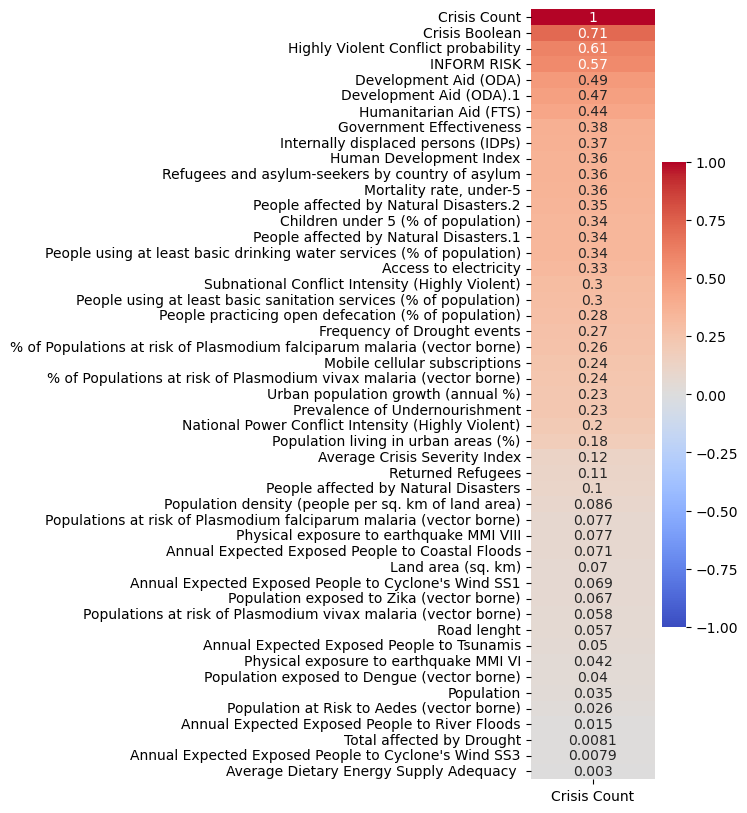

In [255]:
corr2 = merged_df2.corr()

index_corr2 = corr2.loc[["Crisis Count"]].transpose().abs()
index_corr2 = index_corr2.sort_values(by='Crisis Count', ascending=False)

plt.figure(figsize=(2,10))
sns.heatmap(data=index_corr2, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

C:\Users\Huawei MateBook D14\AppData\Local\Temp\ipykernel_31044\3127507121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr22 = merged_df2.corr()


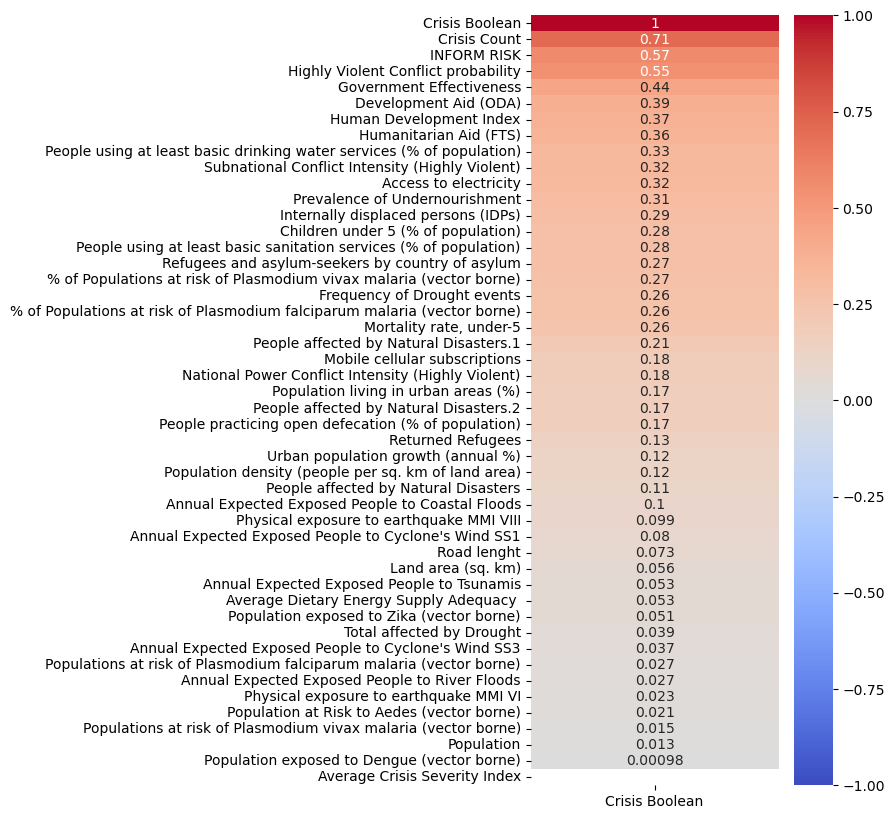

In [260]:
corr22 = merged_df2.corr()

index_corr22 = corr22.loc[["Crisis Boolean"]].transpose().abs()
index_corr22 = index_corr22.sort_values(by='Crisis Boolean', ascending=False)

plt.figure(figsize=(4,10))
sns.heatmap(data=index_corr22, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

C:\Users\Huawei MateBook D14\AppData\Local\Temp\ipykernel_31044\398937919.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr21 = merged_df2.corr()


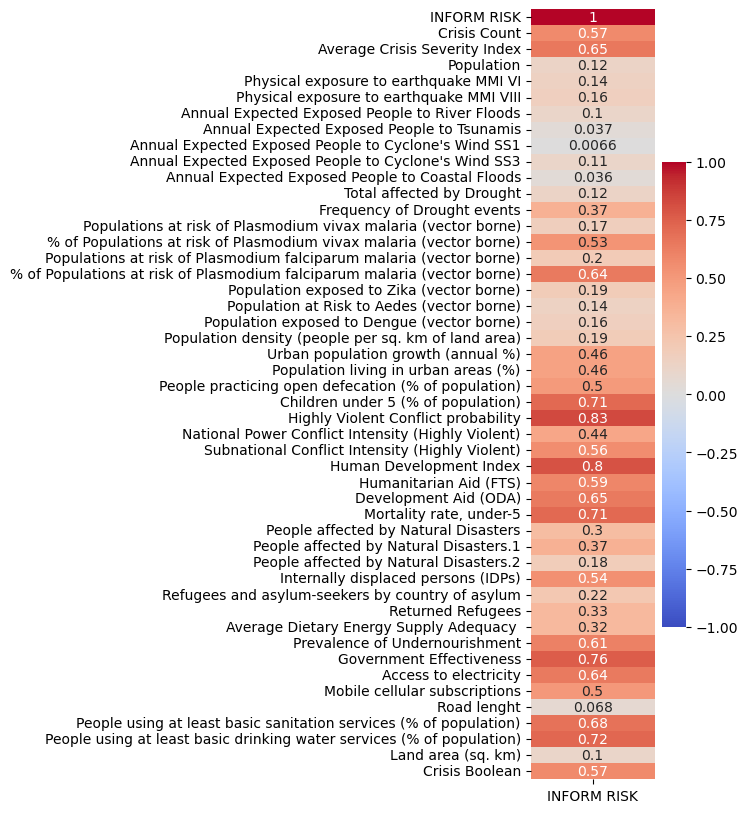

In [262]:
corr21 = merged_df2.corr()

index_corr21 = corr21.loc[["INFORM RISK"]].transpose().abs()

plt.figure(figsize=(2,10))
sns.heatmap(data=index_corr21, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

## Create dataframe containing only the countries with crises

In [264]:
crisis_df = merged_df2[merged_df2['Crisis Count'] != 0]

In [265]:
crisis_df.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Crisis Count,Average Crisis Severity Index,Average Crisis Severity Category,Population,Physical exposure to earthquake MMI VI,Physical exposure to earthquake MMI VIII,...,Average Dietary Energy Supply Adequacy,Prevalence of Undernourishment,Government Effectiveness,Access to electricity,Mobile cellular subscriptions,Road lenght,People using at least basic sanitation services (% of population),People using at least basic drinking water services (% of population),Land area (sq. km),Crisis Boolean
0,Afghanistan,AFG,8.1,Very High,2.0,3.6,High,42239854,80872.0,38334.0,...,107.0,30.1,-1.63,97.7,56.6,72000.0,50.5,75.1,652230.0,True
2,Algeria,DZA,3.6,Medium,4.0,2.6,Medium,45606480,75089.0,22015.0,...,152.0,2.4,-0.62,99.8,106.4,110000.0,86.0,94.4,2381740.0,True
3,Angola,AGO,5.2,High,1.0,3.1,High,36684202,0.0,0.0,...,114.0,21.6,-1.06,48.2,44.4,51000.0,51.7,57.2,1246700.0,True
6,Armenia,ARM,2.9,Low,2.0,2.5,Medium,2777970,5878.0,1900.0,...,144.0,2.4,-0.25,100.0,129.0,20000.0,93.9,100.0,28480.0,True
9,Azerbaijan,AZE,4.8,Medium,2.0,2.4,Medium,10412652,21752.0,5965.0,...,139.0,2.4,0.25,100.0,104.9,26000.0,96.1,96.0,82658.0,True


### Display highest correlations

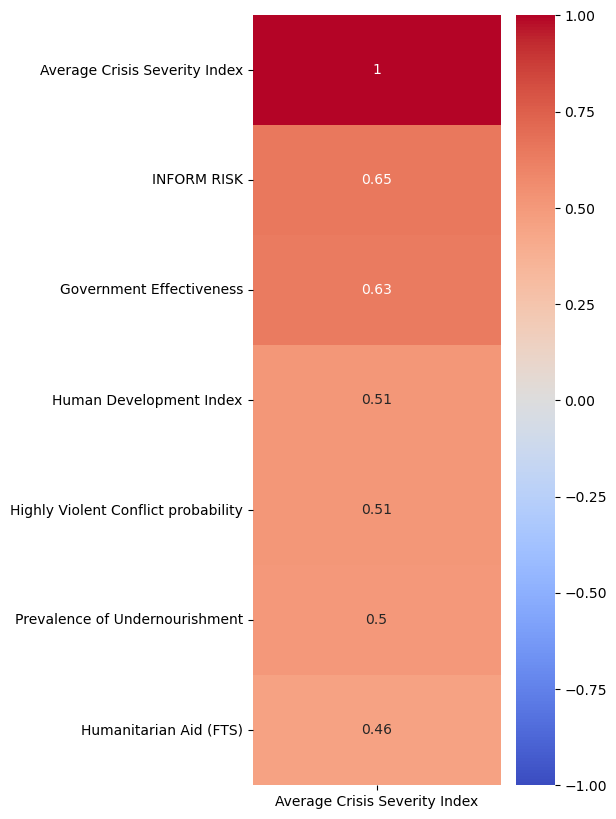

In [267]:
displaydf = crisis_df[['Average Crisis Severity Index', 'Prevalence of Undernourishment','INFORM RISK', 'Highly Violent Conflict probability', 'Government Effectiveness', 'Human Development Index', 'Humanitarian Aid (FTS)']]

corr3 = displaydf.corr()

index_corr3 = corr3.loc[["Average Crisis Severity Index"]].transpose().abs()
index_corr3 = index_corr3.sort_values(by='Average Crisis Severity Index', ascending=False)

plt.figure(figsize=(4,10))
sns.heatmap(data=index_corr3, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

# Export dataframes to be used with machine learning
- merged_df2 contains all countries
- crisis_df contains only countries with crises

In [ ]:
merged_df2.to_csv('merged_df2.csv')

In [ ]:
crisis_df.to_csv('crisis_df.csv')